In [1]:
import scipy as sp
import scipy.integrate as sp_int
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def powerlaw_p_vec(alpha:float, max_deg:int):
    """
    Create the power law probability vector, required for the powerlaw probability generating function below
    """
    dist = [0]*(max_deg+1)
    alpha = float(alpha)
    denom = 0.0
    for i in range(1, max_deg+1):
        denom += i**(-1*alpha)
    for k in range(1, max_deg+1):
        dist[k] = k**(-1*alpha)/denom
    
    return dist

def calc_g(p_vec, x):
    """
    Probability generating function for generic powerlaw distribution
    """
    g_val = 0
    for k in range(len(p_vec)):
        g_val = g_val + p_vec[k]*x**(k)
    return g_val

def calc_g1(p_vec, x):
    """
    First derivative Probability generating function for generic powerlaw distribution
    """
    g_val = 0
    for k in range(len(p_vec)):
        g_val = g_val + (k)*p_vec[k]*x**(k-1)
    return g_val

def calc_g2(p_vec, x):
    """
    Second derivate Probability generating function for generic powerlaw distribution
    """
    g_val = 0
    for k in range(len(p_vec)):
        g_val = g_val + (k)*(k-1)*p_vec[k]*x**(k-2)
    return g_val

In [3]:
def derv(x,t,lam,rr,mm,pp):
    #y[0]= change of theta 
    #y[1]= change of p_infec 
    #y[2]= change of p_suscep 
    #y[3]= proportion of S 
    #y[4]= change of M_I 
    #y[5]= change of I
    y=list(range(6))#zeros(6);
    y[0]=-rr*x[1]*x[0] 
    y[1]=rr*x[2]*x[1]*x[0]*calc_g2(lam,x[0])/calc_g1(lam,x[0])-rr*x[1]*(1-x[1])-x[1]*mm+pp*(x[4]-x[1]) 
    y[2]=rr*x[2]*x[1]*(1-x[0]*calc_g2(lam,x[0])/calc_g1(lam,x[0]))+pp*(x[0]*calc_g1(lam,x[0])/calc_g1(lam,1)-x[2])
    y[3]=-rr*x[1]*x[0]*calc_g1(lam,x[0]) 
    y[4]=-mm*x[4]+rr*x[1]*(x[0]**2*calc_g2(lam,x[0])+x[0]*calc_g1(lam,x[0])/calc_g1(lam,1)) 
    y[5]=rr*x[1]*x[0]*calc_g1(lam,x[0])-mm*x[5]
    return(y)

In [16]:
lamda = powerlaw_p_vec(2.218, 75)
r = 0.2
mu = 0.2
ro = 0.2
epsilon = 0.001
time = list(range(0,200))
# time = np.linspace(0,200,0.1)
init = [1 - epsilon, # proportion susceptible at start
       epsilon / (1 - epsilon),
       (1 - 2*epsilon)/(1 - epsilon),
       calc_g(lamda, 1 - epsilon),
       epsilon,
       1 - calc_g(lamda, 1- epsilon)]

out=sp_int.odeint(derv, init, time, args=(lamda,r,mu,ro))

In [17]:
N = 10_000
pop_tap = out *N

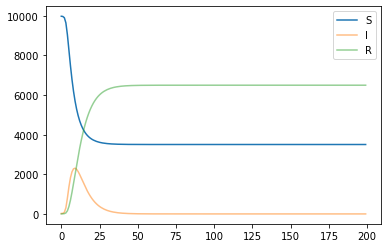

In [18]:
# plt.plot(pop_tap[:,0], alpha =0.5) # change of theta
# plt.plot(pop_tap[:,1])#
# plt.plot(pop_tap[:,2])
plt.plot(pop_tap[:,3], label = 'S')
# plt.plot(pop_tap[:,4], alpha = 0.5)
plt.plot(pop_tap[:,5], alpha = 0.5, label = 'I')
# recovered
plt.plot(10_000 - (pop_tap[:,5]+pop_tap[:,3]), alpha = 0.5, label= 'R')
plt.legend()

In [19]:
# final size
N - (pop_tap[:,5]+pop_tap[:,3])[199:]

array([6496.27581345])